In [1]:
import scanpy as sc
import convexgating as cg
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os

C:\Users\vfriedrich\Anaconda3\envs\gating_env_local\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_f1_hierarch(perf_loc):
    tab = pd.read_csv(perf_loc)
    #tab = pd.read_csv('level_' +str(level) + '/cluster_' + celltype + '/performance.csv')
    best_loc_f1 = np.argmax(tab.iloc[0][1:])
    f1 = tab.iloc[0][1:][best_loc_f1]
    recall = tab.iloc[1][1:][best_loc_f1]
    precision = tab.iloc[2][1:][best_loc_f1]
    hierarchy = best_loc_f1 + 1
    return f1,recall,precision,hierarchy

def get_f1_hierarch_max2hierarch(perf_loc):
    tab = pd.read_csv(perf_loc)
    #tab = pd.read_csv('level_' +str(level) + '/cluster_' + celltype + '/performance.csv')
    best_loc_f1 = np.argmax(tab.iloc[0][1:])
    if best_loc_f1 > 1:
        best_loc_f1 = 1
    f1 = tab.iloc[0][1:][best_loc_f1]
    recall = tab.iloc[1][1:][best_loc_f1]
    precision = tab.iloc[2][1:][best_loc_f1]
    hierarchy = best_loc_f1 + 1
    return f1,recall,precision,hierarchy

In [3]:
samples = ['A','B','C','H','J','O','T','U'] 
cluster_lvl2 = ['cluster_T cell','cluster_NK cell']
cluster_lvl3 = ['cluster_CD4+ T cell','cluster_CD8+ T cell','cluster_Double negative T cell','cluster_Double positive T cell',
 'cluster_NK cell']
cluster_lvl4 = ['cluster_CCR7- CD4+ T cell',
 'cluster_CCR7+ CD4+ T cell',
 'cluster_CCR7- CD8+ T cell',
 'cluster_CCR7+ CD8+ T cell',
'cluster_Double negative T cell',
'cluster_Double positive T cell',
'cluster_NK cell']


cluster_lvl5 = ['cluster_CD4+ CM T cell','cluster_CD4+ TEMRA','cluster_CD8+ CM T cell','cluster_CD8+ TE T cell','cluster_Double negative T cell','cluster_NK cell','cluster_Naive CD8+ T cell',
'cluster_CD4+ EM T cell','cluster_CD4+ TRM T cell','cluster_CD8+ EM T cell','cluster_CD8+ TRM T cell','cluster_Double positive T cell','cluster_Naive CD4+ T cell']

In [4]:
gating_dir_lvl2 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl2_hull' 
overview_lvl2 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl2:
        perf_loc = os.path.join(gating_dir_lvl2,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        overview_lvl2 = overview_lvl2.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl2['level'] = 'lvl2'
    

gating_dir_lvl3 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl3_hull' 
overview_lvl3 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl3:
        perf_loc = os.path.join(gating_dir_lvl3,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        overview_lvl3 = overview_lvl3.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl3['level'] = 'lvl3'

gating_dir_lvl4 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl4_hull' 
overview_lvl4 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl4:
        perf_loc = os.path.join(gating_dir_lvl4,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        overview_lvl4 = overview_lvl4.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl4['level'] = 'lvl4'

gating_dir_lvl5 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl5_hull' 
overview_lvl5 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl5:
        perf_loc = os.path.join(gating_dir_lvl5,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        overview_lvl5 = overview_lvl5.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl5['level'] = 'lvl5'

# level 2

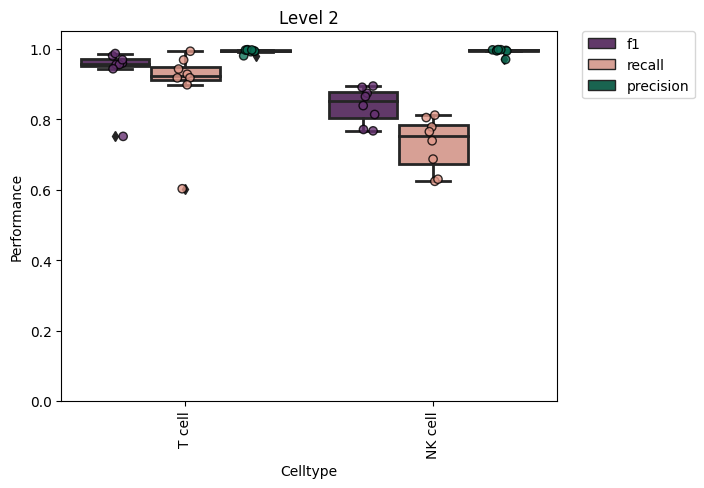

In [22]:
overview_lvl2['celltype_compact'] =  list(overview_lvl2['cluster'].apply(lambda x: x.split('_')[1]))

melted_lvl2 = pd.melt(overview_lvl2[['f1','recall','precision','celltype_compact']],id_vars=['celltype_compact'])
melted_lvl2.rename(columns = {'value':'score', 'variable':'metric'}, inplace = True)

colors={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}

ax =sns.boxplot(x="celltype_compact",y="score",hue="metric",data = melted_lvl2,palette = colors,linewidth = 2,width = 0.85)
sns.stripplot(x="celltype_compact",y="score", dodge=True,hue="metric",data = melted_lvl2,size = 6,edgecolor = 'black',linewidth= 1,
              jitter = True,alpha =0.8,palette = colors)
plt.ylim([0,1.05])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Celltype')
plt.ylabel('Performance')
plt.xticks(rotation=90,fontsize = 10)
# Add a title
plt.title('Level 2')
plt.savefig('figures_supplement/P04_celltype_scores_lvl2.pdf',bbox_inches = 'tight')

# level 3

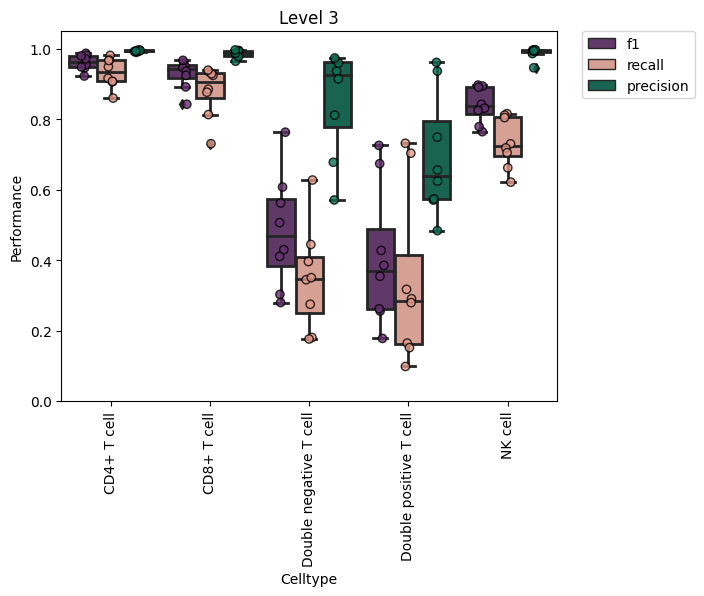

In [21]:
overview_lvl3['celltype_compact'] =  list(overview_lvl3['cluster'].apply(lambda x: x.split('_')[1]))

melted_lvl3 = pd.melt(overview_lvl3[['f1','recall','precision','celltype_compact']],id_vars=['celltype_compact'])
melted_lvl3.rename(columns = {'value':'score', 'variable':'metric'}, inplace = True)

colors={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}

ax =sns.boxplot(x="celltype_compact",y="score",hue="metric",data = melted_lvl3,palette = colors,linewidth = 2,width = 0.85)
sns.stripplot(x="celltype_compact",y="score", dodge=True,hue="metric",data = melted_lvl3,size = 6,edgecolor = 'black',linewidth= 1,
              jitter = True,alpha =0.8,palette = colors)
plt.ylim([0,1.05])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Celltype')
plt.ylabel('Performance')
plt.xticks(rotation=90,fontsize = 10)
# Add a title
plt.title('Level 3')
plt.savefig('figures_supplement/P04_celltype_scores_lvl3.pdf',bbox_inches = 'tight')

# level 4

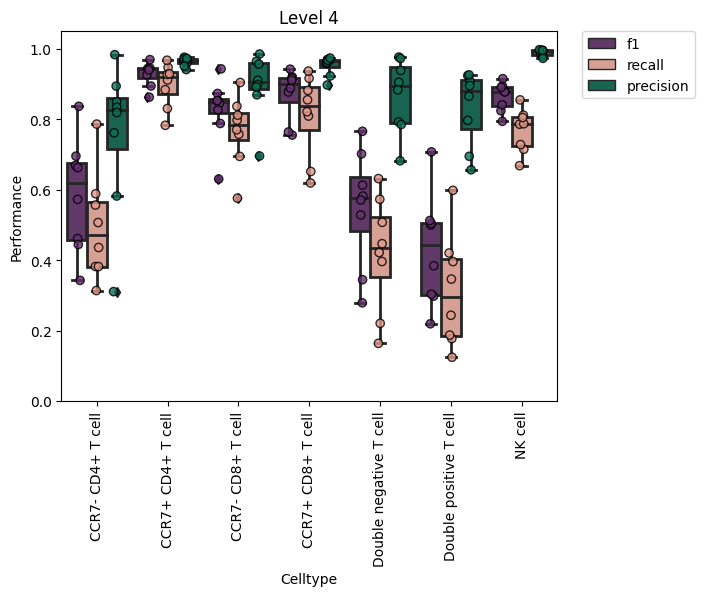

In [20]:
overview_lvl4['celltype_compact'] =  list(overview_lvl4['cluster'].apply(lambda x: x.split('_')[1]))

melted_lvl4 = pd.melt(overview_lvl4[['f1','recall','precision','celltype_compact']],id_vars=['celltype_compact'])
melted_lvl4.rename(columns = {'value':'score', 'variable':'metric'}, inplace = True)

colors={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}

ax =sns.boxplot(x="celltype_compact",y="score",hue="metric",data = melted_lvl4,palette = colors,linewidth = 2,width = 0.85)
sns.stripplot(x="celltype_compact",y="score", dodge=True,hue="metric",data = melted_lvl4,size = 6,edgecolor = 'black',linewidth= 1,
              jitter = True,alpha =0.8,palette = colors)
plt.ylim([0,1.05])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Celltype')
plt.ylabel('Performance')
plt.xticks(rotation=90,fontsize = 10)
# Add a title
plt.title('Level 4')
plt.savefig('figures_supplement/P04_celltype_scores_lvl4.pdf',bbox_inches = 'tight')

# level 5

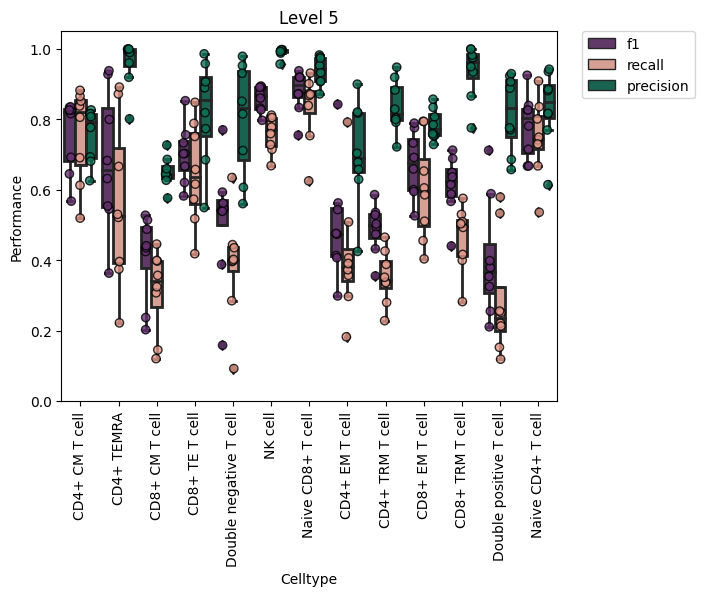

In [19]:
overview_lvl5['celltype_compact'] =  list(overview_lvl5['cluster'].apply(lambda x: x.split('_')[1]))

melted_lvl5 = pd.melt(overview_lvl5[['f1','recall','precision','celltype_compact']],id_vars=['celltype_compact'])
melted_lvl5.rename(columns = {'value':'score', 'variable':'metric'}, inplace = True)

colors={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}

ax =sns.boxplot(x="celltype_compact",y="score",hue="metric",data = melted_lvl5,palette = colors,linewidth = 2,width = 0.85)
sns.stripplot(x="celltype_compact",y="score", dodge=True,hue="metric",data = melted_lvl5,size = 6,edgecolor = 'black',linewidth= 1,
              jitter = True,alpha =0.8,palette = colors)
plt.ylim([0,1.05])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Celltype')
plt.ylabel('Performance')
plt.xticks(rotation=90,fontsize = 10)
# Add a title
plt.title('Level 5')
plt.savefig('figures_supplement/P04_celltype_scores_lvl5.pdf',bbox_inches = 'tight')